# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data_all.zip')

In [3]:
#Labels: 1-9->1-9, 10-35->A-Z, 36-61->a-z
X=df[[x for x in df.columns if x!='e']]
y=df['e']

In [4]:
X=np.array(X)
y=np.array(y)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [5]:
#Logistic Regression and SVC needed way too many iterartion to converge
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score

In [6]:
from sklearn.preprocessing import RobustScaler

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.35)

In [8]:
y_train_upper,y_test_upper=np.where((y_train>9) & (y_train<36),1,0),np.where((y_test>9) & (y_test<36),1,0)

Linear cart
Train as: 1.0, Test as: 0.7511440285676498
Train bas: 1.0, Test bas: 0.6858286562455105
Train ps: [1. 1.], Test ps: [0.8312633  0.53746544]
Train rs: [1. 1.], Test rs: [0.82738149 0.54427582]
Train f1s: [1. 1.], Test f1s: [0.82931785 0.54084919]
Train conf_matrix:
 [[29728     0]
 [    0 10984]]
Test conf_matriz: 
[[45712  9537]
 [ 9279 11082]]
Train


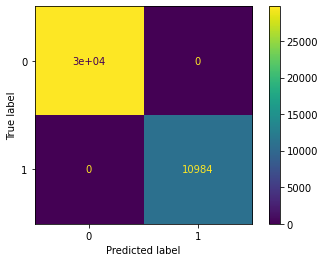

Test


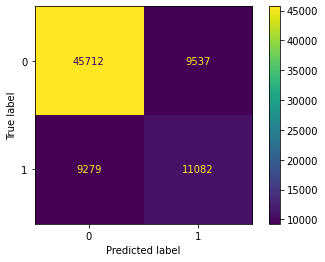

In [9]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_upper)
y_pred_upper_cart=cart.predict(X_train)
y_test_pred_upper_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_cart)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_cart)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_cart)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_cart,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_cart,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_cart,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_upper);

Linear lda
Train as: 0.7534387895460798, Test as: 0.7483269408808358
Train bas: 0.5951273336615663, Test bas: 0.5888287484587782
Train ps: [0.77242792 0.60341058], Test ps: [0.77013723 0.57771295]
Train rs: [0.93898009 0.25127458], Test rs: [0.93449655 0.24316094]
Train f1s: [0.84759967 0.35480139], Test f1s: [0.8443932  0.34226262]
Train conf_matrix:
 [[27914  1814]
 [ 8224  2760]]
Test conf_matriz: 
[[51630  3619]
 [15410  4951]]
Train


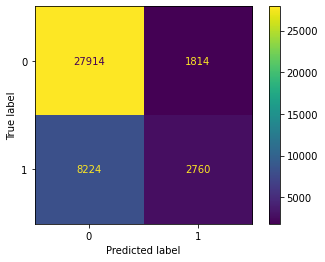

Test


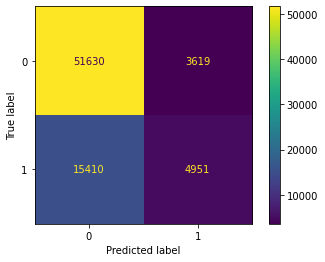

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_upper)
y_pred_upper_lda=lda.predict(X_train)
y_test_pred_upper_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_lda)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_lda)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_lda)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_lda,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_lda,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_lda,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_upper);

Linear nb
Train as: 0.7396590685792886, Test as: 0.7433805052241766
Train bas: 0.5551532853932954, Test bas: 0.5605401299819583
Train ps: [0.75366662 0.56401729], Test ps: [0.75648988 0.58356595]
Train rs: [0.95590016 0.15440641], Test rs: [0.9567956  0.16428466]
Train f1s: [0.84282176 0.24244157], Test f1s: [0.84493355 0.2563906 ]
Train conf_matrix:
 [[28417  1311]
 [ 9288  1696]]
Test conf_matriz: 
[[52862  2387]
 [17016  3345]]
Train


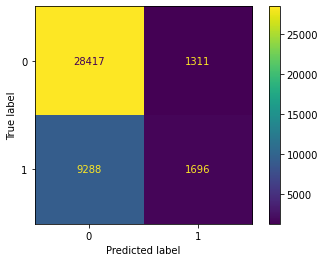

Test


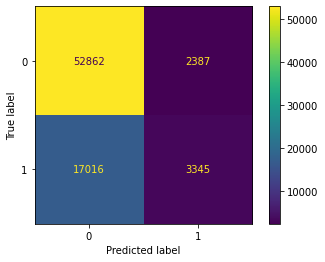

In [11]:
nb = GaussianNB()
nb.fit(X_train,y_train_upper)
y_pred_upper_nb=nb.predict(X_train)
y_test_pred_upper_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_nb)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_nb)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_nb)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_nb,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_nb,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_nb,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_upper);

Linear rfc
Train as: 1.0, Test as: 0.8378389101970639
Train bas: 1.0, Test bas: 0.7364516747748835
Train ps: [1. 1.], Test ps: [0.84298206 0.81293463]
Train rs: [1. 1.], Test rs: [0.9561802  0.51672315]
Train f1s: [1. 1.], Test f1s: [0.89602008 0.63183497]
Train conf_matrix:
 [[29728     0]
 [    0 10984]]
Test conf_matriz: 
[[52828  2421]
 [ 9840 10521]]
Train


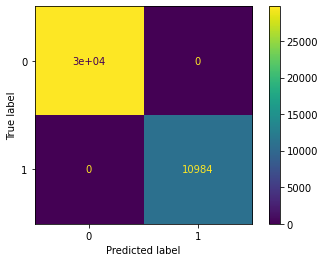

Test


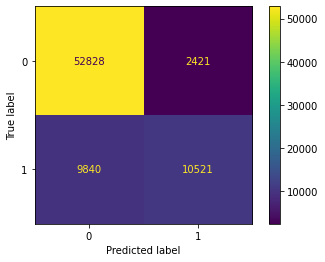

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_upper)
y_pred_upper_rfc=rfc.predict(X_train)
y_test_pred_upper_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_rfc)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_rfc)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_rfc)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_upper);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_upper);

* Try to do the same thing with lowercases.

In [13]:
y_train_lower,y_test_lower=np.where(y_train>=36,1,0),np.where(y_test>=36,1,0)

Linear cart
Train as: 1.0, Test as: 0.7816823171538156
Train bas: 1.0, Test bas: 0.703972504612963
Train ps: [1. 1.], Test ps: [0.8641735  0.52837299]
Train rs: [1. 1.], Test rs: [0.84909301 0.558852  ]
Train f1s: [1. 1.], Test f1s: [0.85656689 0.54318528]
Train conf_matrix:
 [[31214     0]
 [    0  9498]]
Test conf_matriz: 
[[49289  8760]
 [ 7747  9814]]
Train


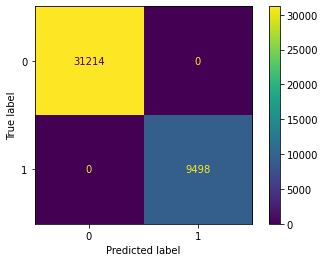

Test


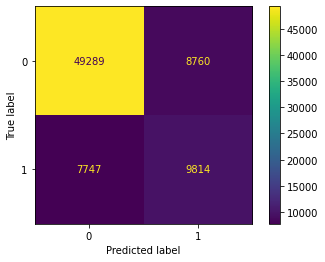

In [14]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_lower)
y_pred_lower_cart=cart.predict(X_train)
y_test_pred_lower_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_cart)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_cart)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_cart)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_cart,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_cart,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_cart,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_lower);

Linear lda
Train as: 0.8155580664177638, Test as: 0.8058590133580215
Train bas: 0.6632683631075532, Test bas: 0.648246110457007
Train ps: [0.83363828 0.69172932], Test ps: [0.82825225 0.65092166]
Train rs: [0.94877299 0.37776374], Test rs: [0.94258299 0.35390923]
Train f1s: [0.88748708 0.4886619 ], Test f1s: [0.88172684 0.45851931]
Train conf_matrix:
 [[29615  1599]
 [ 5910  3588]]
Test conf_matriz: 
[[54716  3333]
 [11346  6215]]
Train


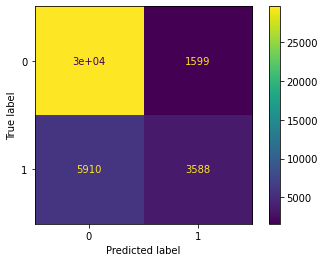

Test


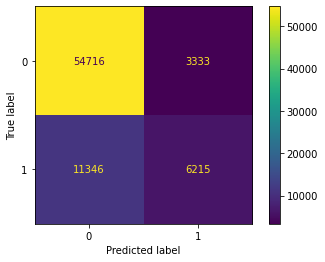

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_lower)
y_pred_lower_lda=lda.predict(X_train)
y_test_pred_lower_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_lda)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_lda)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_lda)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_lda,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_lda,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_lda,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_lower);

Linear nb
Train as: 0.281194733739438, Test as: 0.2825552175638143
Train bas: 0.5236181485155971, Test bas: 0.5242373966281207
Train ps: [0.91208791 0.24226777], Test ps: [0.90795967 0.24146922]
Train rs: [0.06913564 0.97810065], Test rs: [0.07290393 0.97557087]
Train f1s: [0.12852889 0.38834546], Test f1s: [0.1349705 0.3871201]
Train conf_matrix:
 [[ 2158 29056]
 [  208  9290]]
Test conf_matriz: 
[[ 4232 53817]
 [  429 17132]]
Train


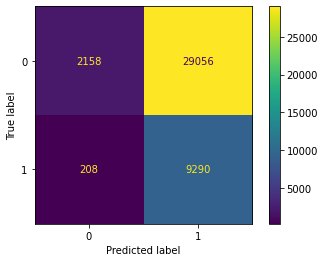

Test


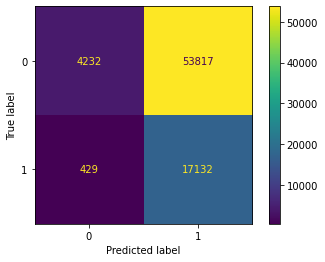

In [16]:
nb = GaussianNB()
nb.fit(X_train,y_train_lower)
y_pred_lower_nb=nb.predict(X_train)
y_test_pred_lower_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_nb)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_nb)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_nb)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_nb,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_nb,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_nb,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_lower);

Linear rfc
Train as: 1.0, Test as: 0.8766565269144293
Train bas: 1.0, Test bas: 0.7574648798601467
Train ps: [1. 1.], Test ps: [0.87445242 0.89024737]
Train rs: [1. 1.], Test rs: [0.98005134 0.53487842]
Train f1s: [1. 1.], Test f1s: [0.92424538 0.66825555]
Train conf_matrix:
 [[31214     0]
 [    0  9498]]
Test conf_matriz: 
[[56891  1158]
 [ 8168  9393]]
Train


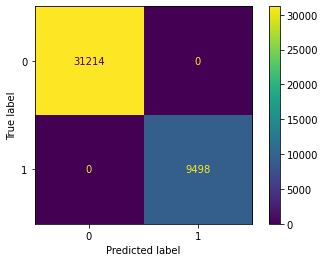

Test


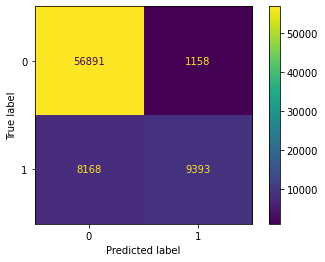

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_lower)
y_pred_lower_rfc=rfc.predict(X_train)
y_test_pred_lower_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_rfc)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_rfc)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_rfc)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_lower);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_lower);

* Try to do the same thing with numbers.

In [18]:
y_train_number,y_test_number=np.where(y_train<=9,1,0),np.where(y_test<=9,1,0)

Linear cart
Train as: 1.0, Test as: 0.7657849490808094
Train bas: 1.0, Test bas: 0.7657709583103307
Train ps: [1. 1.], Test ps: [0.76450574 0.76709179]
Train rs: [1. 1.], Test rs: [0.77029165 0.76125027]
Train f1s: [1. 1.], Test f1s: [0.76738779 0.76415986]
Train conf_matrix:
 [[20482     0]
 [    0 20230]]
Test conf_matriz: 
[[29211  8711]
 [ 8998 28690]]
Train


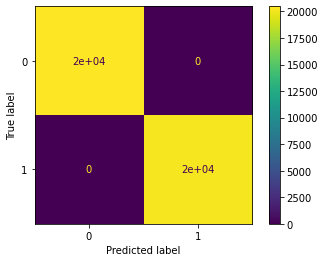

Test


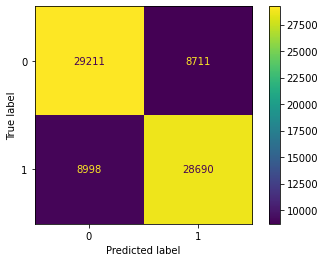

In [19]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_number)
y_pred_number_cart=cart.predict(X_train)
y_test_pred_number_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_cart)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_cart)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_cart)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_cart,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_cart,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_cart,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_number);

Linear lda
Train as: 0.7420170956966005, Test as: 0.7323105409337389
Train bas: 0.7421730921470755, Test bas: 0.7323887764919291
Train ps: [0.75731009 0.72810844], Test ps: [0.74593858 0.71995865]
Train rs: [0.716971   0.76737519], Test rs: [0.70710933 0.75766822]
Train f1s: [0.73658867 0.7472263 ], Test f1s: [0.72600514 0.73833226]
Train conf_matrix:
 [[14685  5797]
 [ 4706 15524]]
Test conf_matriz: 
[[26815 11107]
 [ 9133 28555]]
Train


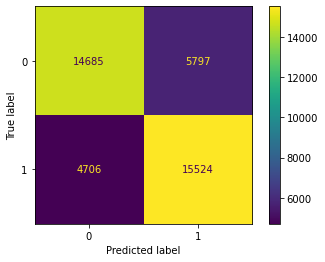

Test


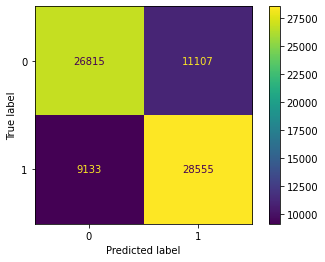

In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_number)
y_pred_number_lda=lda.predict(X_train)
y_test_pred_number_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_lda)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_lda)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_lda)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_lda,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_lda,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_lda,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_number);

Linear nb
Train as: 0.5503045785026528, Test as: 0.5539478904906758
Train bas: 0.5527872730854233, Test bas: 0.5551836081191402
Train ps: [0.76905941 0.52620528], Test ps: [0.77503933 0.52914007]
Train rs: [0.15169417 0.95388038], Test rs: [0.15589895 0.95446827]
Train f1s: [0.25340511 0.67825384], Test f1s: [0.25958288 0.68083657]
Train conf_matrix:
 [[ 3107 17375]
 [  933 19297]]
Test conf_matriz: 
[[ 5912 32010]
 [ 1716 35972]]
Train


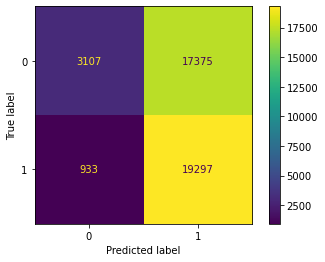

Test


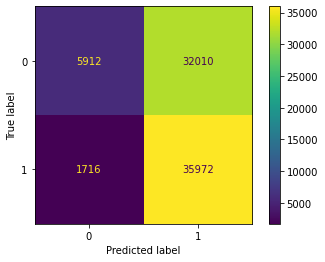

In [21]:
nb = GaussianNB()
nb.fit(X_train,y_train_number)
y_pred_number_nb=nb.predict(X_train)
y_test_pred_number_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_nb)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_nb)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_nb)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_nb,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_nb,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_nb,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_number);

Linear rfc
Train as: 1.0, Test as: 0.8680201031609576
Train bas: 1.0, Test bas: 0.8680356620468579
Train ps: [1. 1.], Test ps: [0.87246408 0.86364472]
Train rs: [1. 1.], Test rs: [0.86300828 0.87306304]
Train f1s: [1. 1.], Test f1s: [0.86771042 0.86832834]
Train conf_matrix:
 [[20482     0]
 [    0 20230]]
Test conf_matriz: 
[[32727  5195]
 [ 4784 32904]]
Train


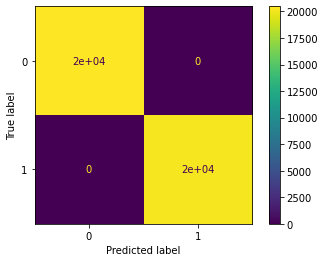

Test


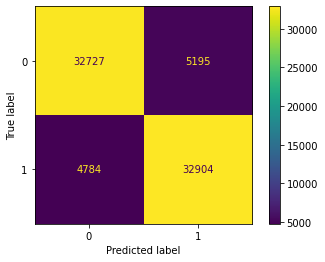

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_number)
y_pred_number_rfc=rfc.predict(X_train)
y_test_pred_number_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_rfc)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_rfc)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_rfc)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_rfc,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_rfc,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_rfc,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_number);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_number);

* Try to do the same thing with all.

In [23]:
y_train_all,y_test_all=np.where(y_train<=9,0,np.where(y_train<36,1,2)),np.where(y_test<=9,0,np.where(y_test<36,1,2))

Linear cart
Train as: 1.0, Test as: 0.6565798174844597
Train bas: 1.0, Test bas: 0.6209168117729896
Train ps: [1. 1. 1.], Test ps: [0.76850469 0.54843291 0.54410268]
Train rs: [1. 1. 1.], Test rs: [0.76475271 0.5500221  0.54797563]
Train f1s: [1. 1. 1.], Test f1s: [0.76662411 0.54922636 0.54603229]
Train conf_matrix:
 [[20230     0     0]
 [    0 10984     0]
 [    0     0  9498]]
Test conf_matriz: 
[[28822  5062  3804]
 [ 4903 11199  4259]
 [ 3779  4159  9623]]
Train


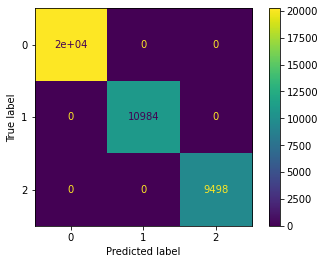

Test


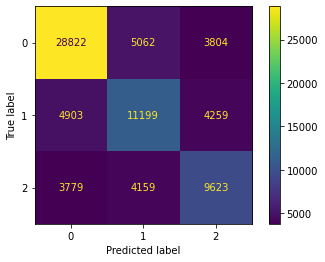

In [24]:
cart = DecisionTreeClassifier()
cart.fit(X_train,y_train_all)
y_pred_all_cart=cart.predict(X_train)
y_test_pred_all_cart=cart.predict(X_test)
print('Linear cart')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_cart)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_cart)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_cart)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_cart)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_cart,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_cart,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_cart,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_cart,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_cart,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_cart,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_cart)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_cart)}')
print('Train')
plot_confusion_matrix(cart,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(cart,X_test,y_test_all);

Linear lda
Train as: 0.6480153271762625, Test as: 0.6336331173125248
Train bas: 0.5826996058827231, Test bas: 0.565447046377756
Train ps: [0.68390101 0.56501891 0.61261028], Test ps: [0.6776626  0.54483762 0.57753176]
Train rs: [0.85654968 0.39439184 0.4971573 ], Test rs: [0.84650287 0.38642503 0.46341325]
Train f1s: [0.7605504  0.46453273 0.5488783 ], Test f1s: [0.75273105 0.45215792 0.51421711]
Train conf_matrix:
 [[17328  1862  1040]
 [ 4706  4332  1946]
 [ 3303  1473  4722]]
Test conf_matriz: 
[[31903  3713  2072]
 [ 8612  7868  3881]
 [ 6563  2860  8138]]
Train


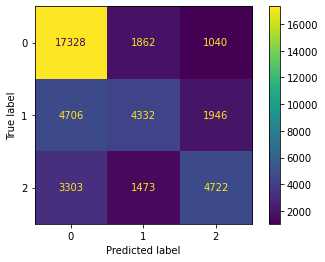

Test


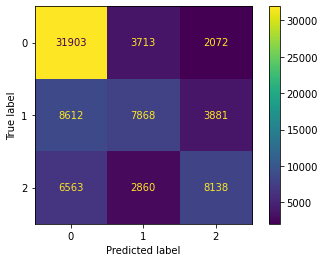

In [25]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train_all)
y_pred_all_lda=lda.predict(X_train)
y_test_pred_all_lda=lda.predict(X_test)
print('Linear lda')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_lda)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_lda)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_lda)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_lda)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_lda,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_lda,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_lda,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_lda,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_lda,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_lda,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_lda)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_lda)}')
print('Train')
plot_confusion_matrix(lda,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(lda,X_test,y_test_all);

Linear nb
Train as: 0.5502063273727648, Test as: 0.5477979103293216
Train bas: 0.44198582820201276, Test bas: 0.4373838906169305
Train ps: [0.5711276  0.60917874 0.43508772], Test ps: [0.57101072 0.62307886 0.4140056 ]
Train rs: [0.89782501 0.11480335 0.31332912], Test rs: [0.89612078 0.12145769 0.2945732 ]
Train f1s: [0.69814729 0.19319749 0.36430408], Test f1s: [0.69754425 0.20328812 0.34422411]
Train conf_matrix:
 [[18163   478  1589]
 [ 7448  1261  2275]
 [ 6191   331  2976]]
Test conf_matriz: 
[[33773   906  3009]
 [13575  2473  4313]
 [11798   590  5173]]
Train


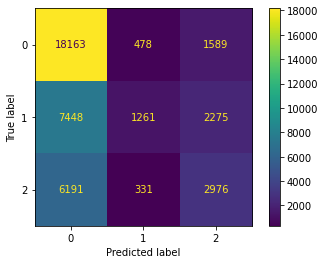

Test


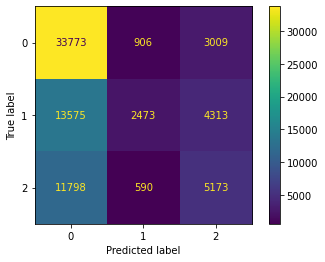

In [26]:
nb = GaussianNB()
nb.fit(X_train,y_train_all)
y_pred_all_nb=nb.predict(X_train)
y_test_pred_all_nb=nb.predict(X_test)
print('Linear nb')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_nb)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_nb)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_nb)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_nb)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_nb,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_nb,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_nb,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_nb,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_nb,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_nb,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_nb)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_nb)}')
print('Train')
plot_confusion_matrix(nb,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(nb,X_test,y_test_all);

Linear rfc
Train as: 1.0, Test as: 0.7981351673059119
Train bas: 1.0, Test bas: 0.7521938140249174
Train ps: [1. 1. 1.], Test ps: [0.81558393 0.74831713 0.81120407]
Train rs: [1. 1. 1.], Test rs: [0.93371896 0.68793281 0.63492967]
Train f1s: [1. 1. 1.], Test f1s: [0.87066246 0.7168556  0.71232352]
Train conf_matrix:
 [[20230     0     0]
 [    0 10984     0]
 [    0     0  9498]]
Test conf_matriz: 
[[35190  1635   863]
 [ 4622 14007  1732]
 [ 3335  3076 11150]]
Train


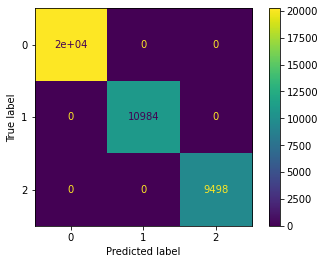

Test


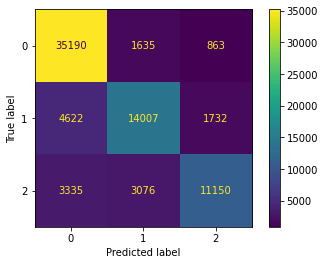

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_all)
y_pred_all_rfc=rfc.predict(X_train)
y_test_pred_all_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_all,y_pred_all_rfc)}, Test as: {accuracy_score(y_test_all,y_test_pred_all_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_all,y_pred_all_rfc)}, Test bas: {balanced_accuracy_score(y_test_all,y_test_pred_all_rfc)}')
print(f'Train ps: {precision_score(y_train_all,y_pred_all_rfc,average=None)}, Test ps: {precision_score(y_test_all,y_test_pred_all_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_all,y_pred_all_rfc,average=None)}, Test rs: {recall_score(y_test_all,y_test_pred_all_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_all,y_pred_all_rfc,average=None)}, Test f1s: {f1_score(y_test_all,y_test_pred_all_rfc,average=None)}')
print(f'Train conf_matrix:\n {confusion_matrix(y_train_all,y_pred_all_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_all,y_test_pred_all_rfc)}')
print('Train')
plot_confusion_matrix(rfc,X_train,y_train_all);
plt.show()
print('Test')
plot_confusion_matrix(rfc,X_test,y_test_all);